# Salary prediction model for programmers
## Structure of the code
1. Data exploration
2. Fit regression full model (with all available columns)
3. **Fit regression partial model (after grouping)**
    1. **Lasso regression**
    2. **Adjusted lasso regression**
    3. **Multilayer perceptron**
    4. **Random forest regression**
4. Interesting observations


## Data exploration
(see 'Data exploration file')

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
developed_df = pd.read_csv('developed_df.csv', low_memory = False)
developing_df = pd.read_csv('developing_df.csv', low_memory = False)
print(developed_df.shape
, developing_df.shape)

(31226, 356) (13324, 354)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
developed_df = shuffle(developed_df)
developing_df = shuffle(developing_df)
dvled_y, dvled_X = developed_df['ConvertedSalary'], developed_df.drop('ConvertedSalary',axis=1)
dvling_y, dvling_X = developing_df['ConvertedSalary'], developing_df.drop('ConvertedSalary',axis=1)
dvledX_train, dvledX_test, dvledy_train, dvledy_test = train_test_split(dvled_X, dvled_y, test_size=0.2, random_state=42)
dvlingX_train, dvlingX_test, dvlingy_train, dvlingy_test = train_test_split(dvling_X, dvling_y, test_size=0.2, random_state=42)


## 3. Fit regression partial model
### 3.1. Lasso Regression

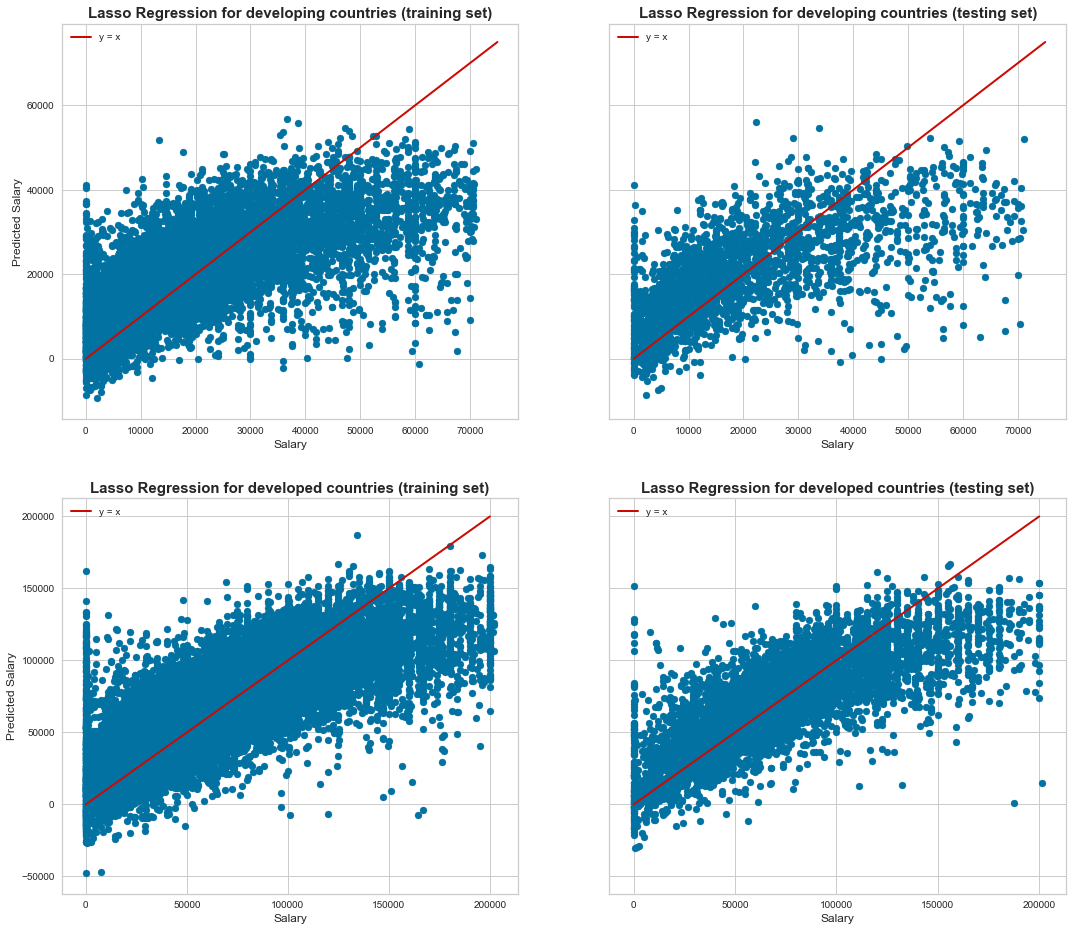

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso

# lasso for developed countries
alphas = np.linspace(5,8)
lasso_dvled = LassoCV(alphas=alphas, cv=5)
lasso_dvled.fit(dvledX_train, dvledy_train)
predicted_dvled_train = lasso_dvled.predict(dvledX_train)
predicted_dvled_test = lasso_dvled.predict(dvledX_test)

# lasso for developing countries
alphas = np.linspace(10,15)
lasso_dvling = LassoCV(alphas=alphas, cv=5)
lasso_dvling.fit(dvlingX_train, dvlingy_train)
predicted_dvling_train = lasso_dvling.predict(dvlingX_train)
predicted_dvling_test = lasso_dvling.predict(dvlingX_test)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row', figsize=(18,16))
ax1.plot([0,75000],[0,75000],'r-', linewidth = 2, label= 'y = x')
ax1.scatter(dvlingy_train, predicted_dvling_train)
ax1.set_xlabel('Salary', fontsize = 12)
ax1.set_ylabel('Predicted Salary', fontsize = 12)
ax1.set_title('Lasso Regression for developing countries (training set)', fontweight="bold", fontsize = 15)
ax1.legend()

ax2.plot([0,75000],[0,75000],'r-', linewidth = 2, label= 'y = x')
ax2.scatter(dvlingy_test,predicted_dvling_test)
ax2.set_xlabel('Salary', fontsize = 12)
ax2.set_title('Lasso Regression for developing countries (testing set)', fontweight="bold", fontsize = 15)
ax2.legend()


ax3.plot([0,200000],[0,200000],'r-', linewidth = 2, label= 'y = x')
ax3.scatter(dvledy_train,predicted_dvled_train)
ax3.set_xlabel('Salary', fontsize = 12)
ax3.set_ylabel('Predicted Salary', fontsize = 12)
ax3.set_title('Lasso Regression for developed countries (training set)', fontweight="bold", fontsize = 15)
ax3.legend()

ax4.plot([0,200000],[0,200000],'r-', linewidth = 2, label= 'y = x')
ax4.scatter(dvledy_test,predicted_dvled_test)
ax4.set_xlabel('Salary', fontsize = 12)
ax4.set_title('Lasso Regression for developed countries (testing set)', fontweight="bold", fontsize = 15)
ax4.legend()


In [21]:
lasso_dvled.get_params

<bound method BaseEstimator.get_params of LassoCV(alphas=array([5.     , 5.06122, 5.12245, 5.18367, 5.2449 , 5.30612, 5.36735,
       5.42857, 5.4898 , 5.55102, 5.61224, 5.67347, 5.73469, 5.79592,
       5.85714, 5.91837, 5.97959, 6.04082, 6.10204, 6.16327, 6.22449,
       6.28571, 6.34694, 6.40816, 6.46939, 6.53061, 6.59184, 6.65306,
       6.7142...898, 7.5102 ,
       7.57143, 7.63265, 7.69388, 7.7551 , 7.81633, 7.87755, 7.93878,
       8.     ]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)>

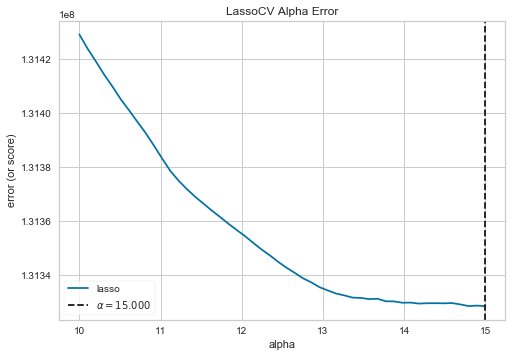

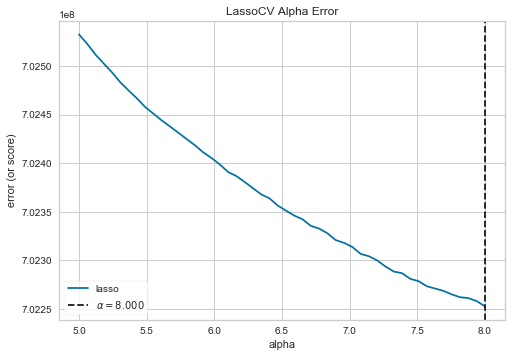

In [22]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import AlphaSelection

alphas = np.linspace(10,15)
lasso = LassoCV(alphas=alphas, cv=5)
visualizer1 = AlphaSelection(lasso)
visualizer1.fit(dvlingX_train, dvlingy_train)
visualizer1.poof()                 # Draw/show/poof the data

#developed countries
alphas = np.linspace(5,8)
lasso = LassoCV(alphas=alphas, cv=5)
visualizer2 = AlphaSelection(lasso)
visualizer2.fit(dvledX_train, dvledy_train)
visualizer2.poof()

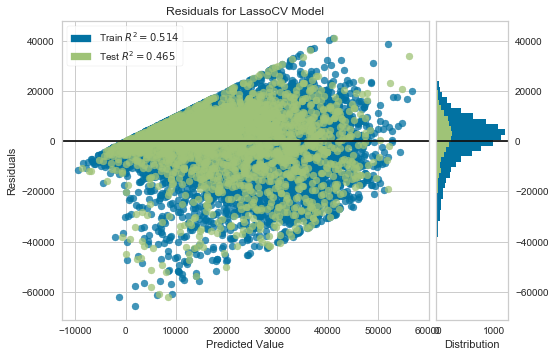

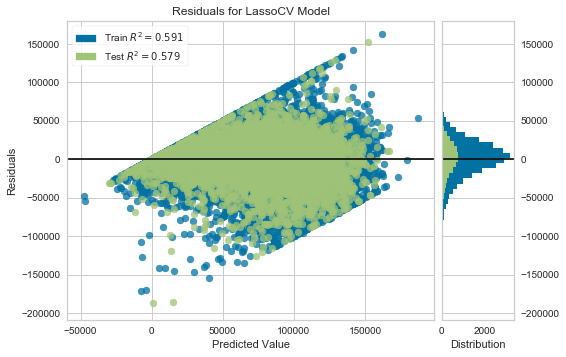

In [23]:
from yellowbrick.regressor import ResidualsPlot

#developing countries
alphas = np.linspace(10,15)
lasso = LassoCV(alphas=alphas, cv=5)
visualizer = ResidualsPlot(lasso)
visualizer.fit(dvlingX_train, dvlingy_train)  # Fit the training data to the model
visualizer.score(dvlingX_test, dvlingy_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data
#developed countries
alphas = np.linspace(5,8)
lasso = LassoCV(alphas=alphas, cv=5)
visualizer = ResidualsPlot(lasso)
visualizer.fit(dvledX_train, dvledy_train)  # Fit the training data to the model
visualizer.score(dvledX_test, dvledy_test)  # Evaluate the model on the test data
visualizer.poof()

### 3.2. Adjusted Lasso Regression

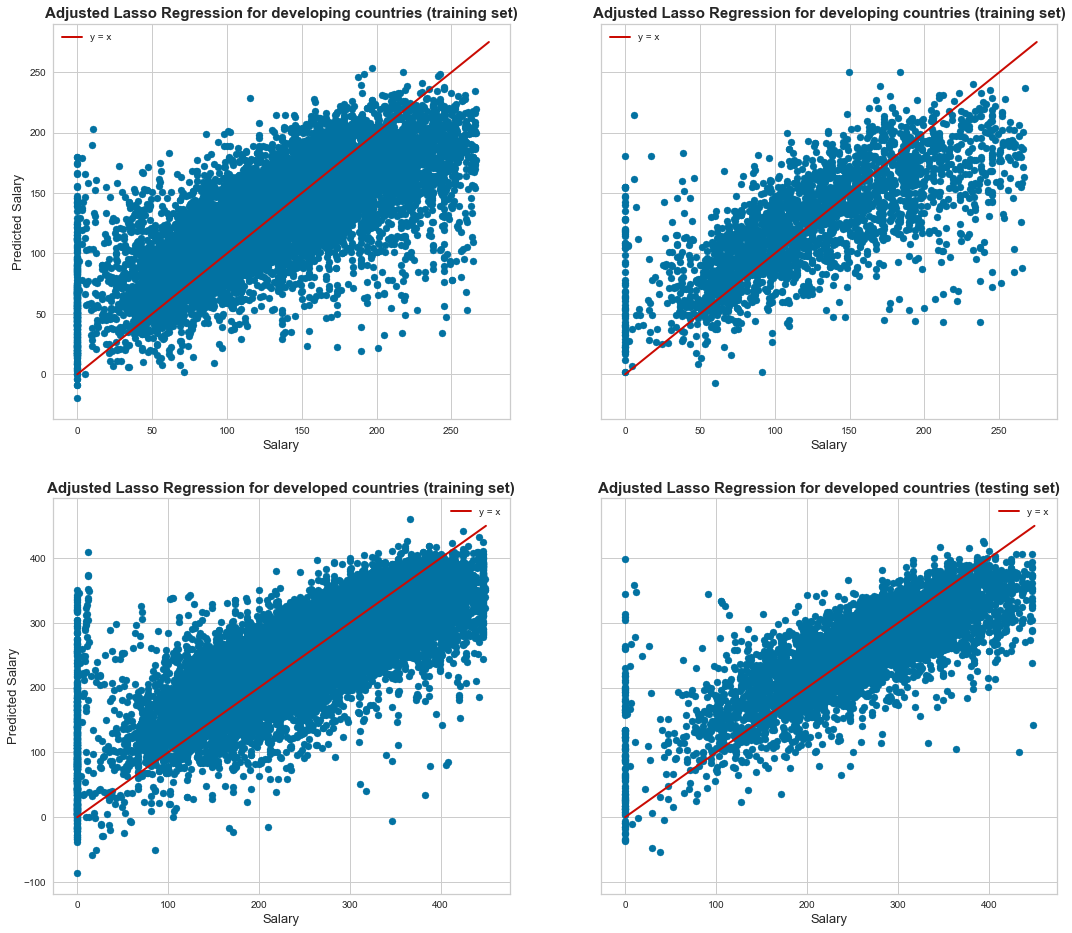

In [24]:
#### from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso

new_dvledy_train, new_dvlingy_train = np.sqrt(dvledy_train), np.sqrt(dvlingy_train)
new_dvledy_test, new_dvlingy_test = np.sqrt(dvledy_test), np.sqrt(dvlingy_test)
alphas = np.linspace(0.001,0.1)
# lasso for develope countries
lasso_dvled = LassoCV(alphas=alphas, cv=5)
lasso_dvled.fit(dvledX_train, new_dvledy_train)
predicted_dvled_train = lasso_dvled.predict(dvledX_train)
predicted_dvled_test = lasso_dvled.predict(dvledX_test)

# lasso for developing countries
lasso_dvling = LassoCV(alphas=alphas, cv=5)
lasso_dvling.fit(dvlingX_train, new_dvlingy_train)
predicted_dvling_train = lasso_dvling.predict(dvlingX_train)
predicted_dvling_test = lasso_dvling.predict(dvlingX_test)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row', figsize=(18,16))
ax1.plot([0,275],[0,275],'r-', linewidth = 2, label= 'y = x')
ax1.scatter(new_dvlingy_train, predicted_dvling_train)
ax1.set_xlabel('Salary', fontsize = 13)
ax1.set_ylabel('Predicted Salary', fontsize = 13)
ax1.set_title('Adjusted Lasso Regression for developing countries (training set)', fontweight="bold", fontsize = 15)
ax1.legend()

ax2.plot([0,275],[0,275],'r-', linewidth = 2, label= 'y = x')
ax2.scatter(new_dvlingy_test,predicted_dvling_test)
ax2.set_xlabel('Salary', fontsize = 13)
ax2.set_title('Adjusted Lasso Regression for developing countries (training set)', fontweight="bold", fontsize = 15)
ax2.legend()


ax3.plot([0,450],[0,450],'r-', linewidth = 2, label= 'y = x')
ax3.scatter(new_dvledy_train,predicted_dvled_train)
ax3.set_xlabel('Salary', fontsize = 13)
ax3.set_ylabel('Predicted Salary', fontsize = 13)
ax3.set_title('Adjusted Lasso Regression for developed countries (training set)', fontweight="bold", fontsize = 15)
ax3.legend()

ax4.plot([0,450],[0,450],'r-', linewidth = 2, label= 'y = x')
ax4.scatter(new_dvledy_test,predicted_dvled_test)
ax4.set_xlabel('Salary', fontsize = 13)
ax4.set_title('Adjusted Lasso Regression for developed countries (testing set)', fontweight="bold", fontsize = 15)
ax4.legend()


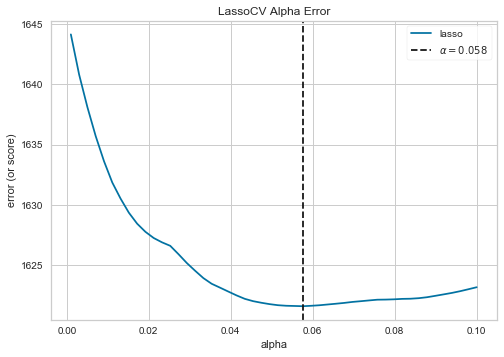

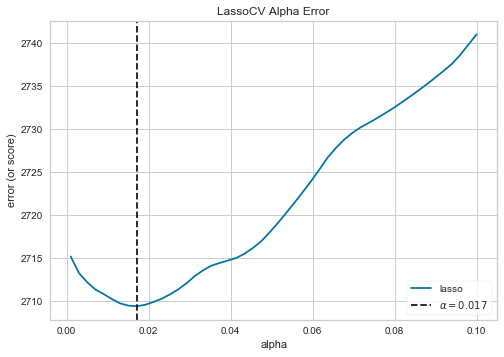

In [25]:
from yellowbrick.regressor import AlphaSelection
alphas = np.linspace(0.001,0.1)
lasso = linear_model.LassoCV(alphas=alphas, cv=5)
visualizer = AlphaSelection(lasso)
visualizer.fit(dvlingX_train, new_dvlingy_train)
g = visualizer.poof()

alphas = np.linspace(0.001,0.1)
lasso = linear_model.LassoCV(alphas=alphas, cv=5)
visualizer = AlphaSelection(lasso)
visualizer.fit(dvledX_train, new_dvledy_train)
g = visualizer.poof()

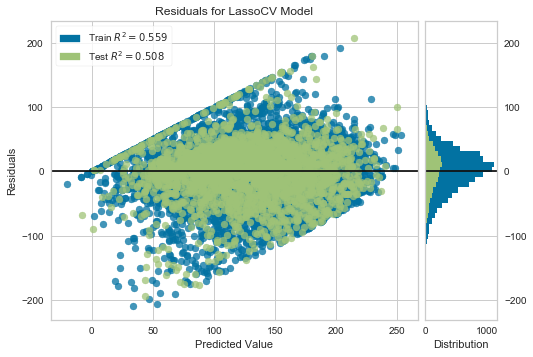

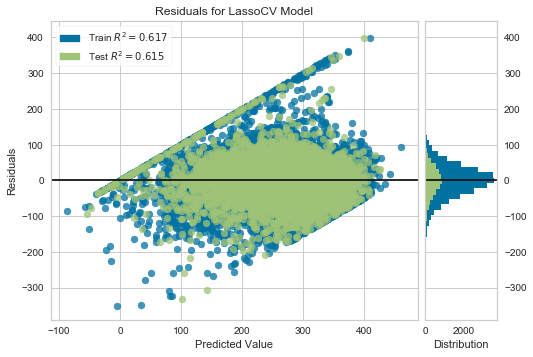

In [26]:
from yellowbrick.regressor import ResidualsPlot
#developing countries
lasso = LassoCV(alphas=alphas, cv=5)
visualizer = ResidualsPlot(lasso)
visualizer.fit(dvlingX_train, new_dvlingy_train)  # Fit the training data to the model
visualizer.score(dvlingX_test, new_dvlingy_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data
#developed countries
lasso = LassoCV(alphas=alphas, cv=5)
visualizer = ResidualsPlot(lasso)
visualizer.fit(dvledX_train, new_dvledy_train)  # Fit the training data to the model
visualizer.score(dvledX_test, new_dvledy_test)  # Evaluate the model on the test data
visualizer.poof()

### 3.3. Multilayer Perceptron

R square = 0.35623370869454973


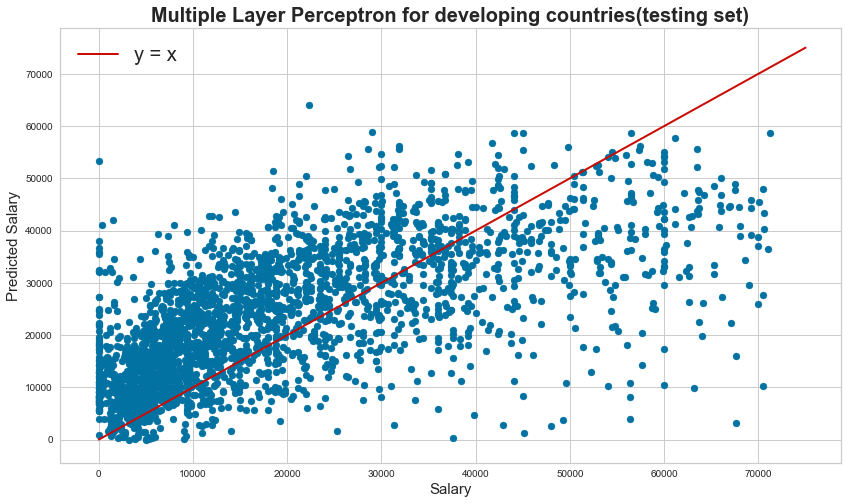

In [27]:
from sklearn.neural_network import MLPRegressor
MLPR = MLPRegressor(hidden_layer_sizes=(400,20), solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant')
MLPR.fit(dvlingX_train, dvlingy_train)
predicted = MLPR.predict(dvlingX_test)
plt.figure(figsize=(14,8))
plt.xlabel('Salary', fontsize = 15)
plt.ylabel('Predicted Salary', fontsize=15)
plt.title('Multiple Layer Perceptron for developing countries(testing set)',fontsize=20, fontweight="bold")
plt.plot([0,75000],[0,75000],'r-', linewidth = 2, label= 'y = x')
plt.legend(loc=2, prop={'size': 20})
plt.scatter(dvlingy_test, predicted)
print('R square =', r2_score(dvlingy_test, predicted))


R square = 0.4951809822616712


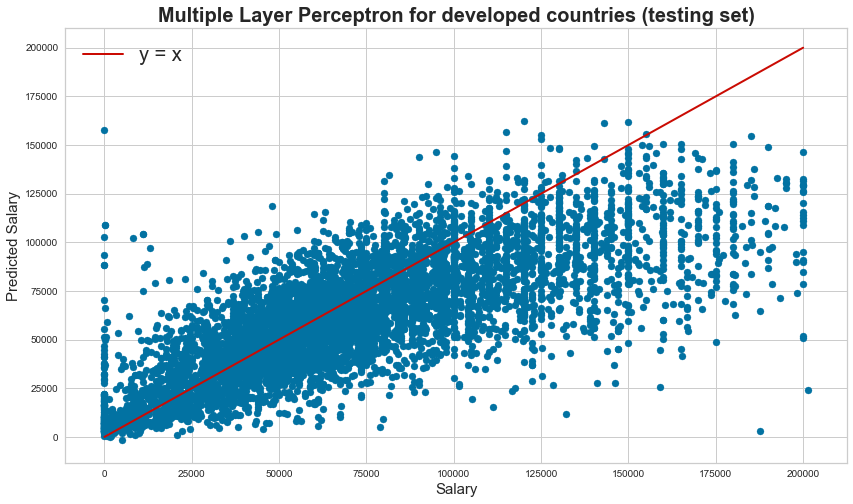

In [28]:
from sklearn.neural_network import MLPRegressor
MLPR = MLPRegressor(hidden_layer_sizes=(400,10), solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant')
MLPR.fit(dvledX_train, dvledy_train)
predicted = MLPR.predict(dvledX_test)
plt.figure(figsize=(14,8))
plt.xlabel('Salary', fontsize = 15)
plt.ylabel('Predicted Salary', fontsize=15)
plt.title('Multiple Layer Perceptron for developed countries (testing set)',fontsize=20, fontweight="bold")
plt.plot([0,200000],[0,200000],'r-', linewidth = 2, label= 'y = x')
plt.legend(loc=2, prop={'size': 20})
plt.scatter(dvledy_test, predicted)
print('R square =', r2_score(dvledy_test, predicted))


### 3.4. Random Forests Regression

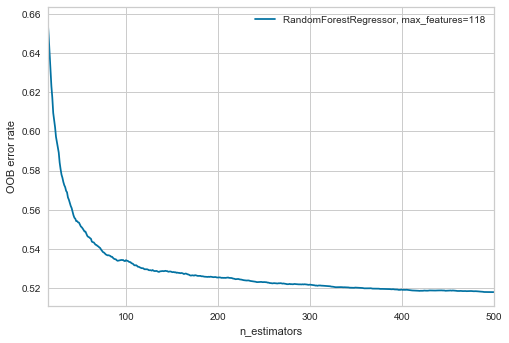

In [29]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestRegressor, max_features=118",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features=118,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 500

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(dvlingX_train, dvlingy_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

R square = 0.4611275247154447
CPU times: user 36.9 s, sys: 268 ms, total: 37.2 s
Wall time: 37 s


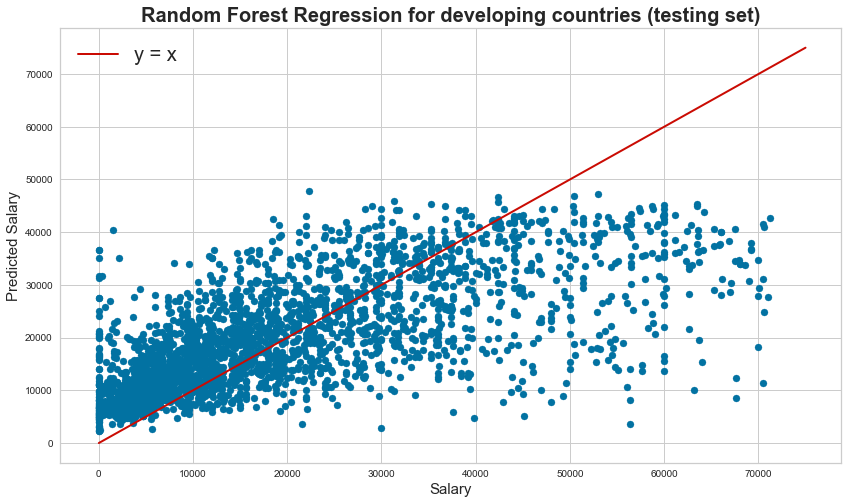

In [30]:
%%time
from sklearn.ensemble import RandomForestRegressor
regr1 = RandomForestRegressor(max_depth=15, random_state=0,n_estimators=300, max_features = 118)
regr1.fit(dvlingX_train, dvlingy_train)
predicted = regr1.predict(dvlingX_test)
plt.figure(figsize=(14,8))
plt.xlabel('Salary', fontsize = 15)
plt.ylabel('Predicted Salary', fontsize=15)
plt.title('Random Forest Regression for developing countries (testing set)',fontsize=20, fontweight="bold")
plt.plot([0,75000],[0,75000],'r-', linewidth = 2, label= 'y = x')
plt.legend(loc=2, prop={'size': 20})
print('R square =', r2_score(dvlingy_test, predicted))
plt.scatter(dvlingy_test, predicted)


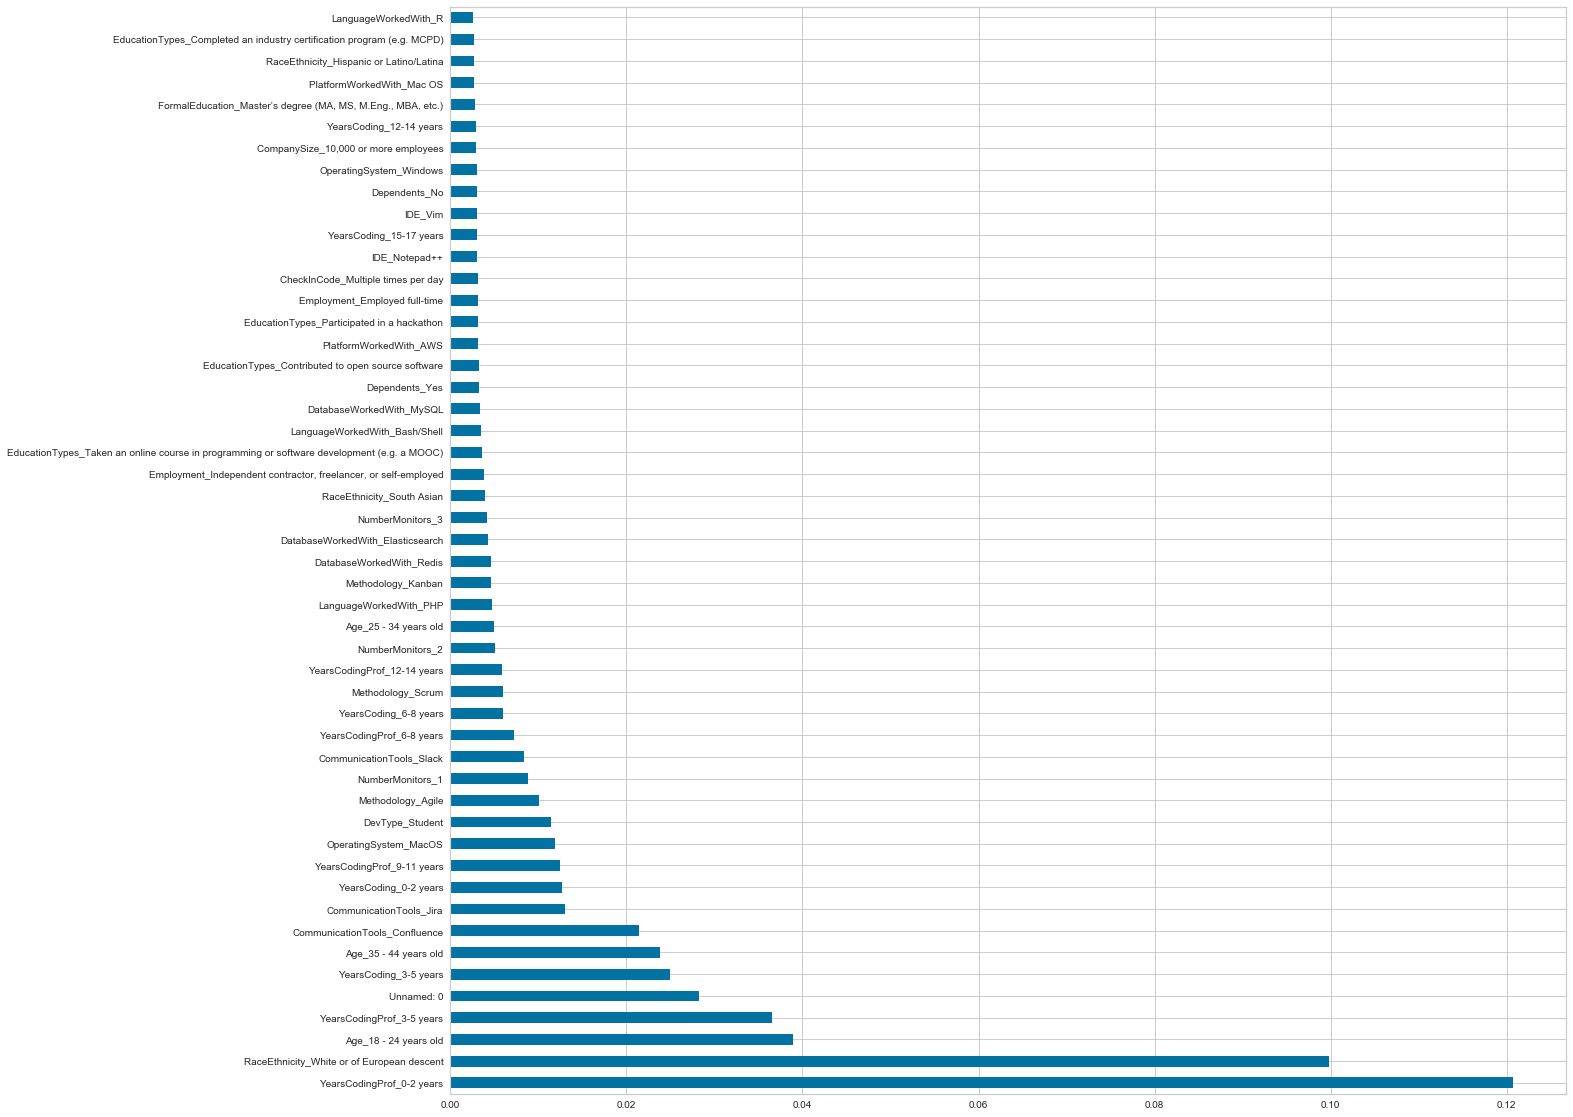

In [32]:
regr1 = RandomForestRegressor(max_depth=15, random_state=0,n_estimators=300, max_features = 118)
regr1.fit(dvlingX_train, dvlingy_train)
predicted = regr1.predict(dvlingX_test)
(pd.Series(regr1.feature_importances_, index=dvlingX_train.columns)
   .nlargest(50)
   .plot(kind='barh', figsize=(20,20)))

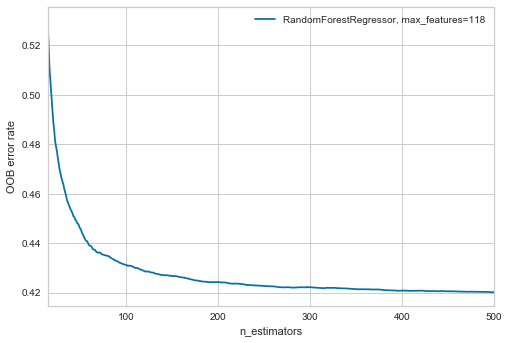

CPU times: user 40min 4s, sys: 6min 1s, total: 46min 6s
Wall time: 45min 13s


In [38]:
%%time
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestRegressor, max_features=118",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features=118,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 500

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(dvledX_train, dvledy_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

R square = 0.5754573875025084
CPU times: user 1min 29s, sys: 873 ms, total: 1min 30s
Wall time: 1min 33s


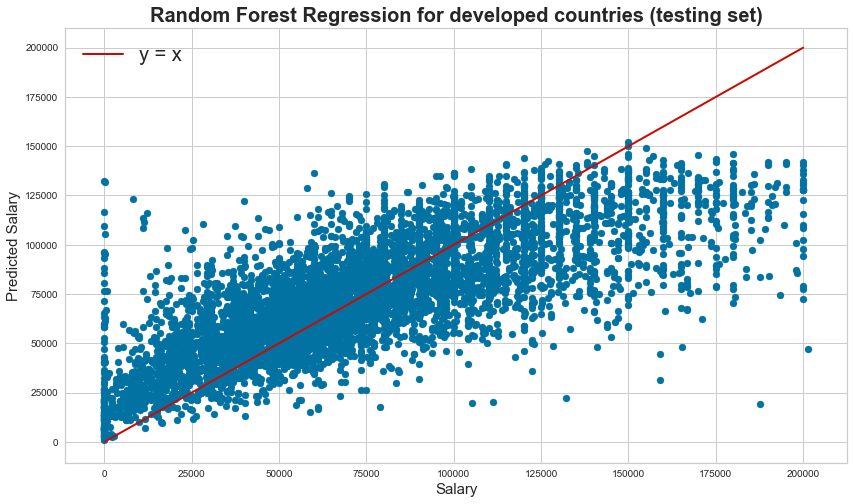

In [36]:
%%time
from sklearn.ensemble import RandomForestRegressor
regr2 = RandomForestRegressor(max_depth=20, random_state=0,n_estimators=200, max_features = 118)
regr2.fit(dvledX_train, dvledy_train)
predicted = regr2.predict(dvledX_test)
plt.figure(figsize=(14,8))
plt.xlabel('Salary', fontsize = 15)
plt.ylabel('Predicted Salary', fontsize=15)
plt.title('Random Forest Regression for developed countries (testing set)',fontsize=20, fontweight="bold")
plt.plot([0,200000],[0,200000],'r-', linewidth = 2, label= 'y = x')
plt.legend(loc=2, prop={'size': 20})
print('R square =', r2_score(dvledy_test, predicted))
plt.scatter(dvledy_test, predicted)


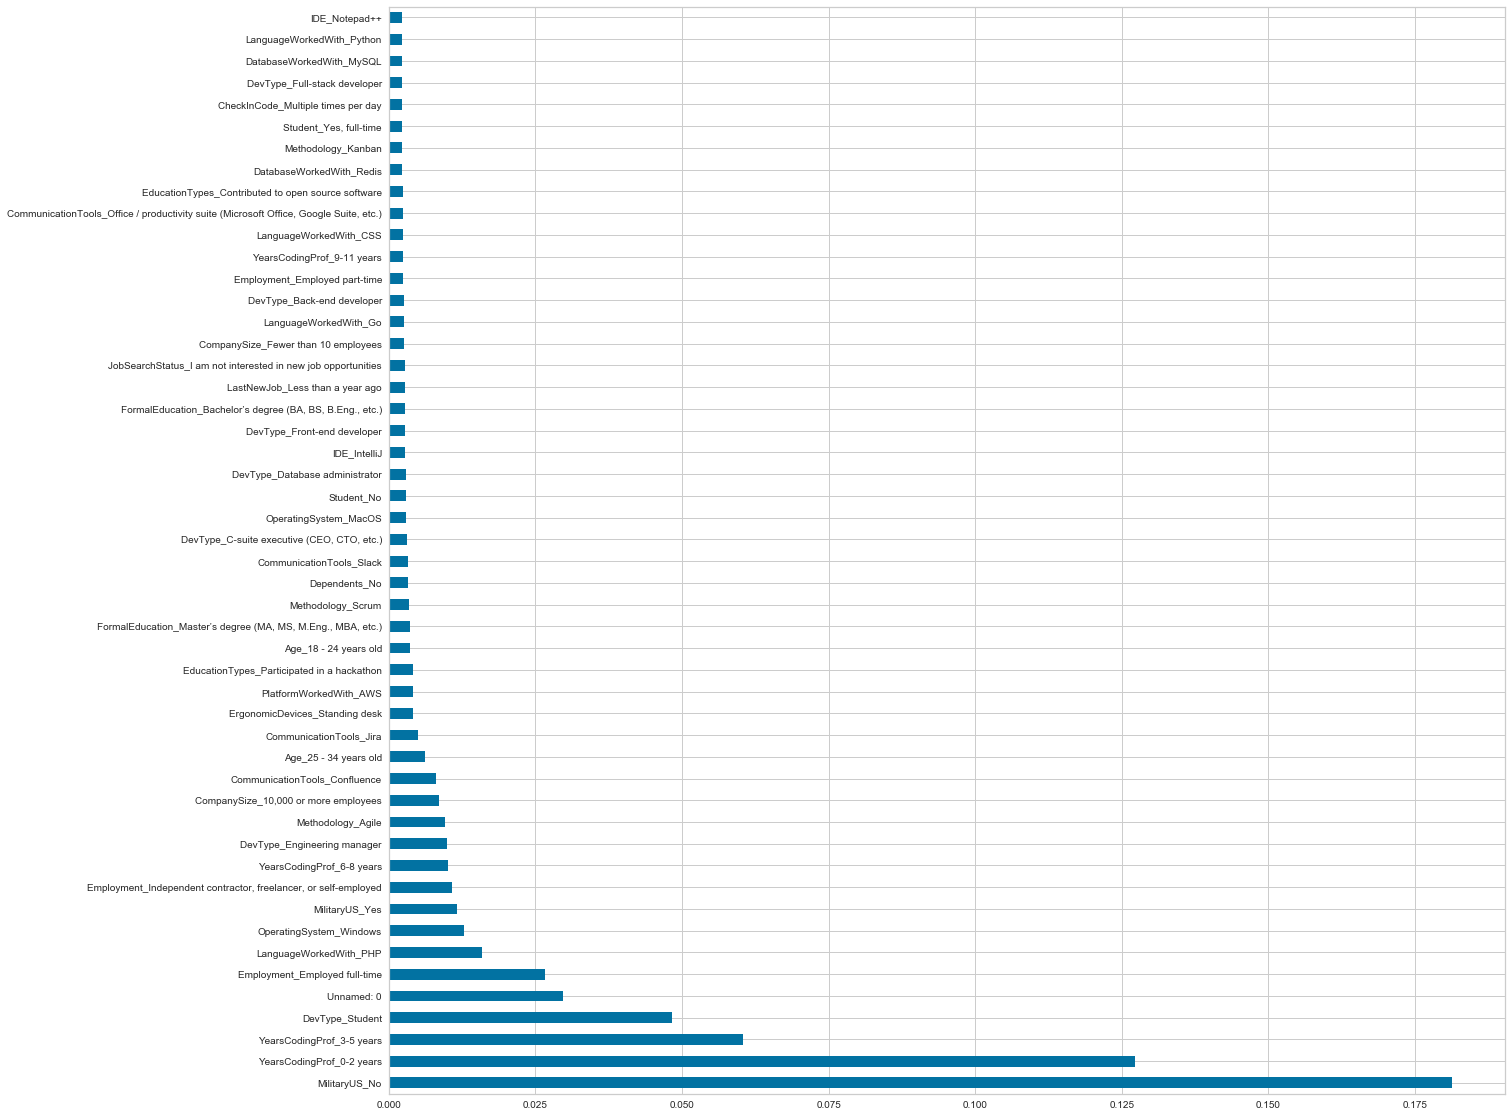

In [37]:
regr2 = RandomForestRegressor(max_depth=20, random_state=0,n_estimators=200)
regr2.fit(dvledX_train, dvledy_train)
plt.figure(figsize=(20,20))
feat_importances = pd.Series(regr2.feature_importances_, index=dvledX_train.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()